In [ ]:
# A lame attempt to implement the envelope_width method.
# But it does not actually give a signal duration in seconds.
# Could try adding percentiles.
# Should also experiment with Hilbert transforms and other envelope methods.

# Could examine 2nd derivative of cumulative function / 1st derivative of RSAM
# Possibly apply a 1-s smoothing function first

In [3]:
import os, sys, glob
import numpy as np
"""
import matplotlib.pyplot as plt
import pandas as pd
"""
from obspy.core import read, Stream
"""
LIBpath = os.path.join( os.getenv('HOME'),'src','kitchensinkGT', 'LIB')
sys.path.append(LIBpath)
from metrics import process_trace
from libMVO import fix_trace_id, inventory_fix_id_mvo, load_mvo_inventory
import random
"""
from obspy.signal.cross_correlation import correlate, xcorr_max

def fix_sample_rate(st, Fs=75.0):
    for tr in st:
        tr.stats.sampling_rate = Fs

SEISAN_DATA = os.path.join( os.getenv('HOME'),'DATA','MVO') # e.g. /home/user/seismo
SEISAN_DB = 'MVOE_'
SEISAN_CONT_DB = 'DSNC_'

In [4]:
WAV1 = os.path.join(SEISAN_DATA, 'WAV_local', SEISAN_DB, '2001/04/2001-04-30-2338-47S.MVO___019')
st1 = read(WAV1)

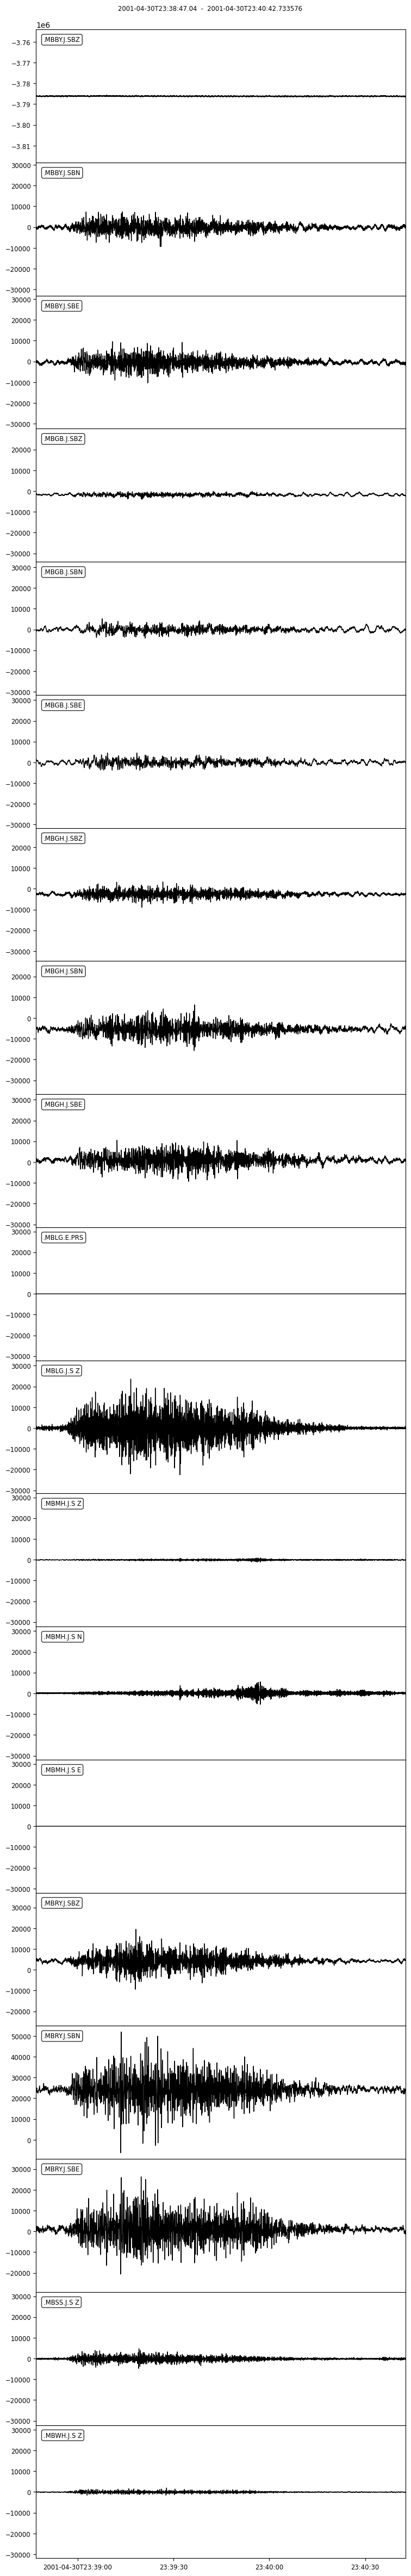

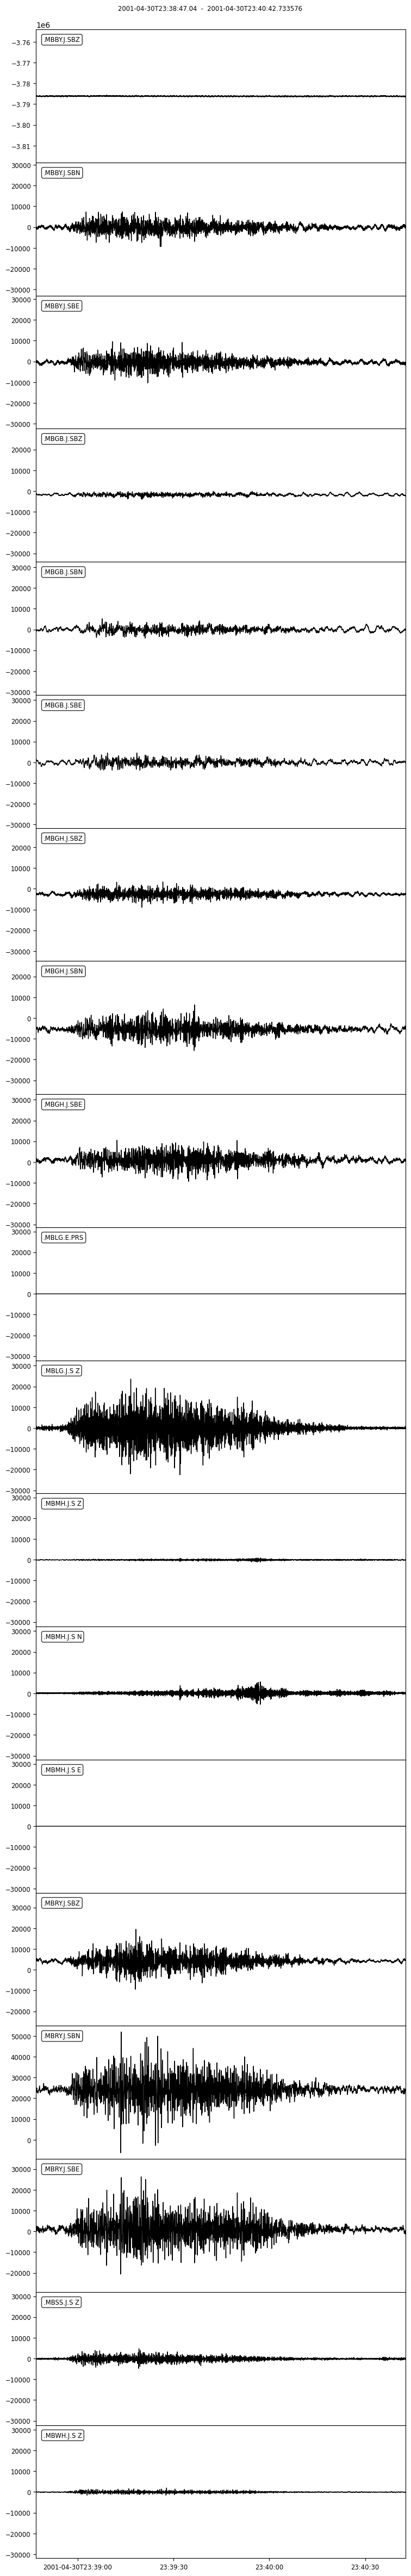

In [5]:
st1.plot()

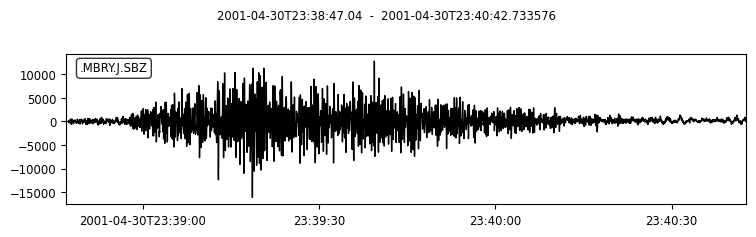

707.233985762 9.40595804977


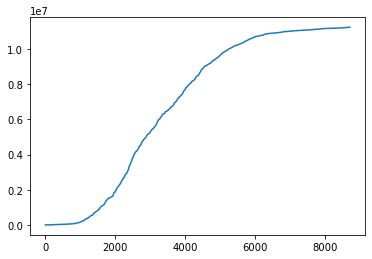

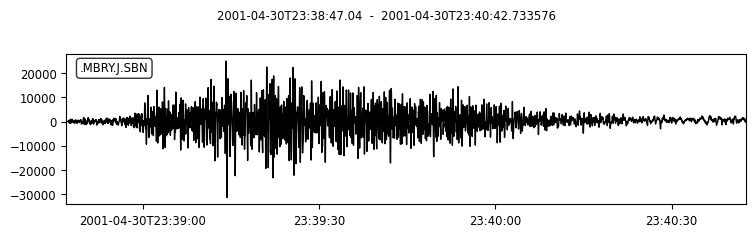

739.868996701 9.83999197634


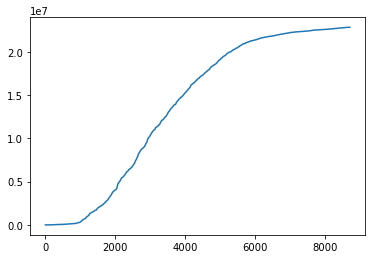

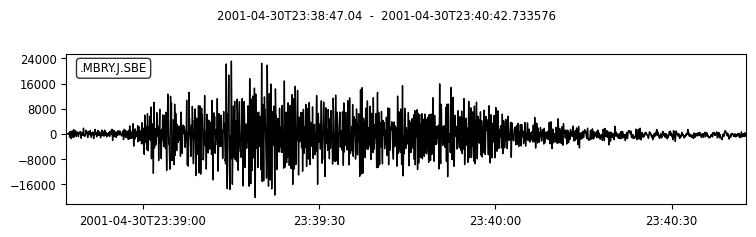

965.994827377 12.8473843247


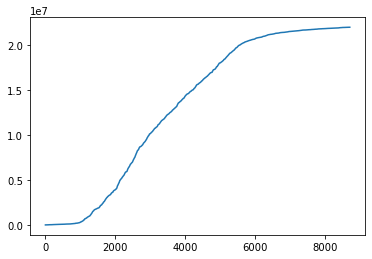

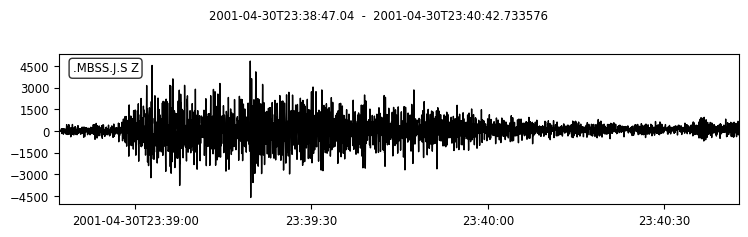

737.346536185 9.80644415727


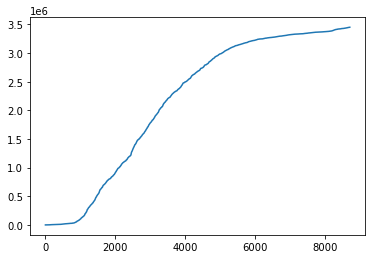

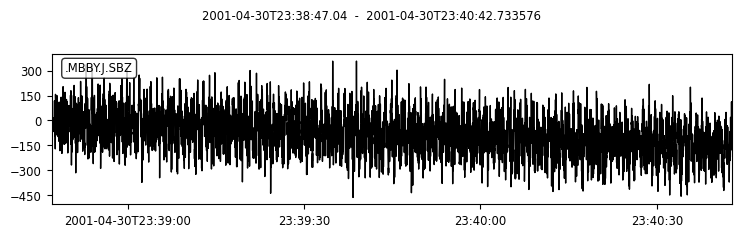

1333.51914541 17.7353257801


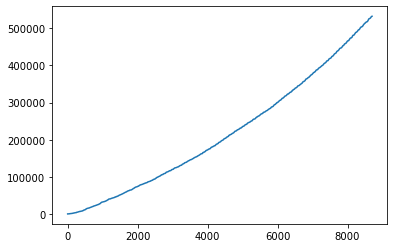

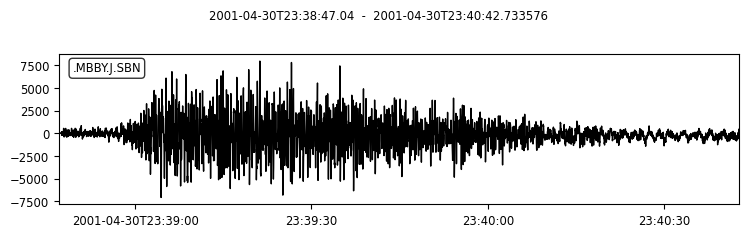

963.762845338 12.8176997651


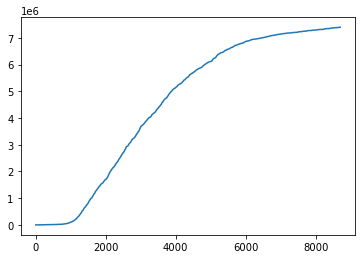

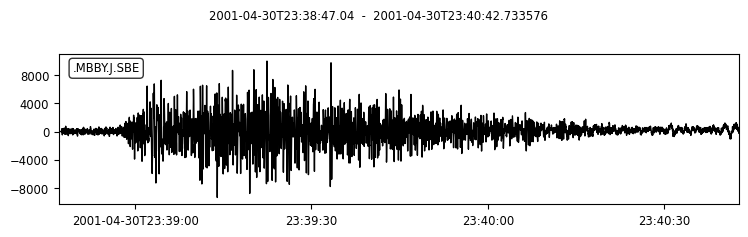

839.528990034 11.1654341007


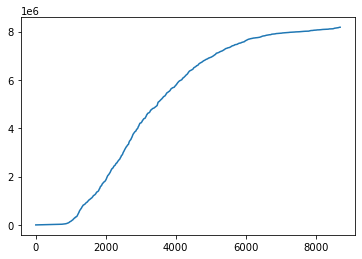

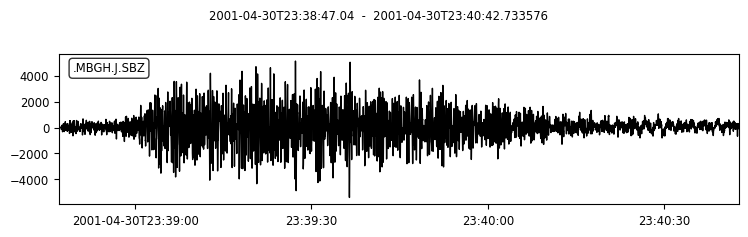

1010.79633037 13.4432282268


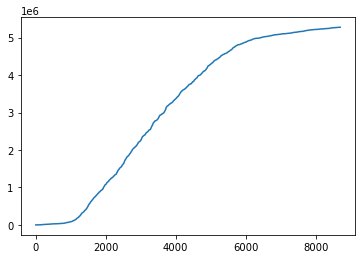

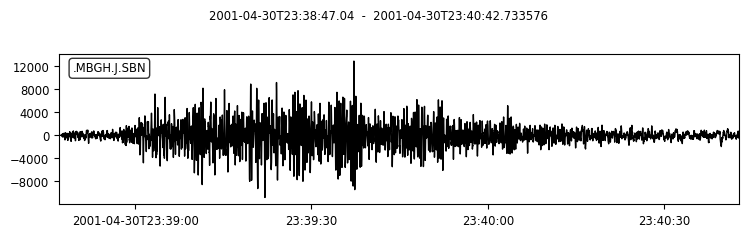

778.506563661 10.3538577425


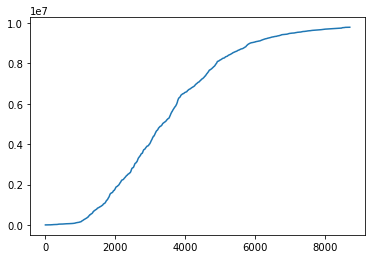

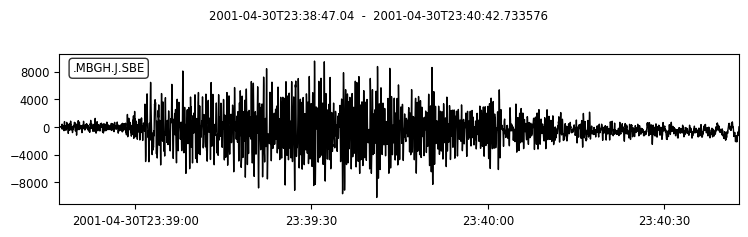

1065.09780586 14.1654183516


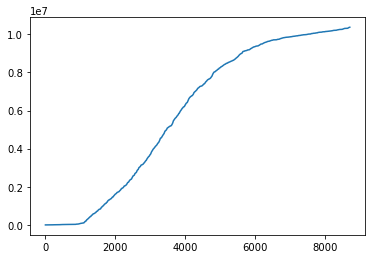

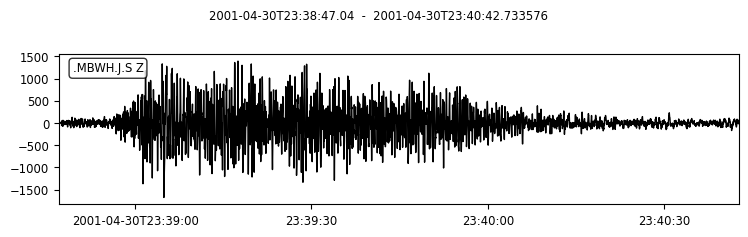

1015.52189784 13.5060765772


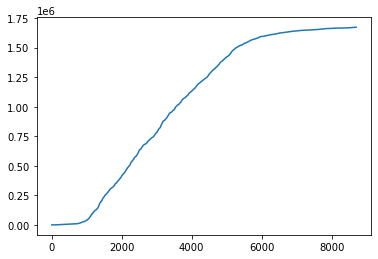

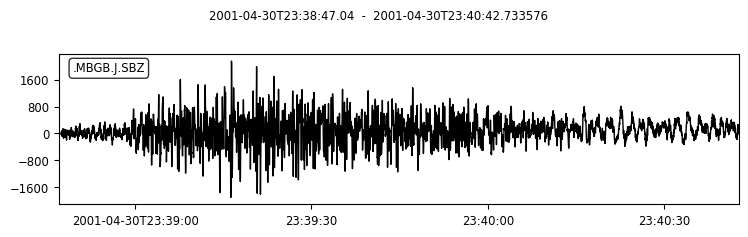

762.02064878 10.1346009945


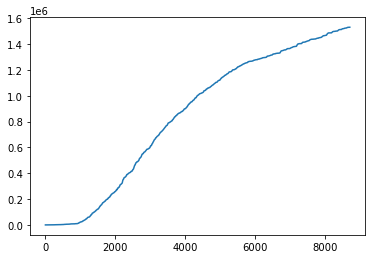

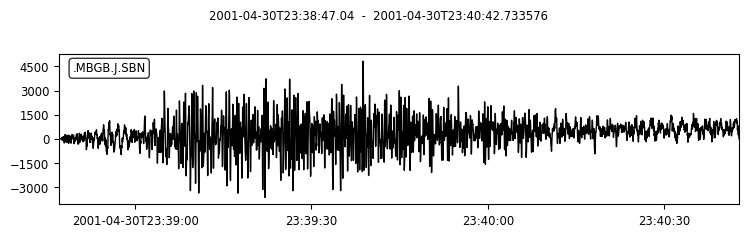

864.514476771 11.4977321023


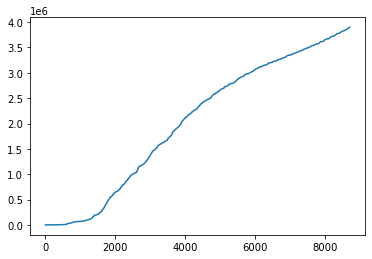

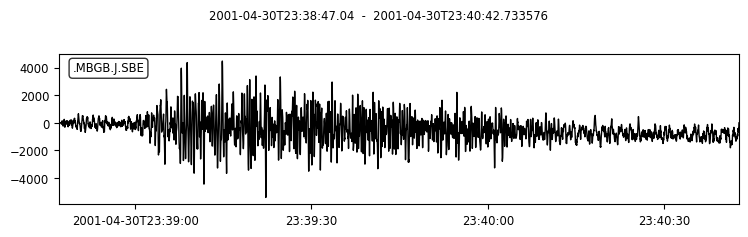

898.142157702 11.9449681833


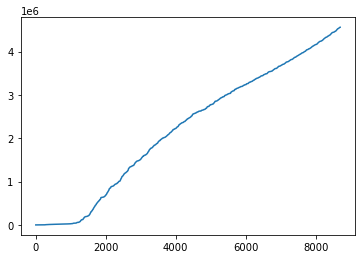

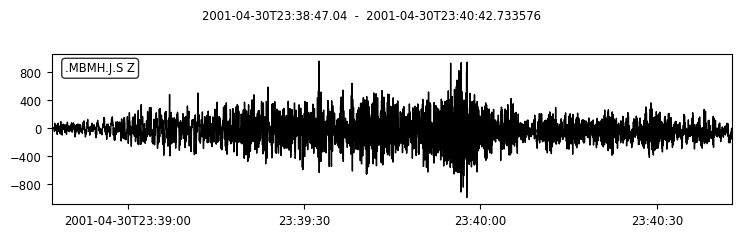

672.119704861 8.93895072299


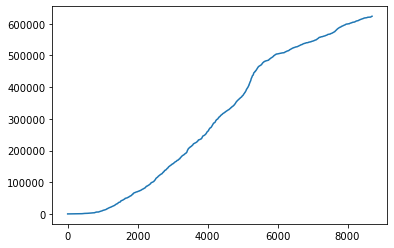

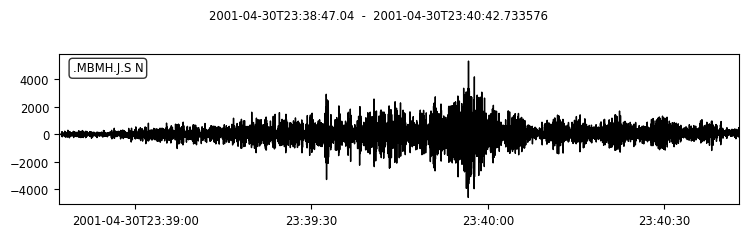

502.600618144 6.68440774231


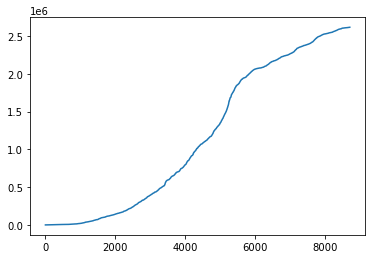

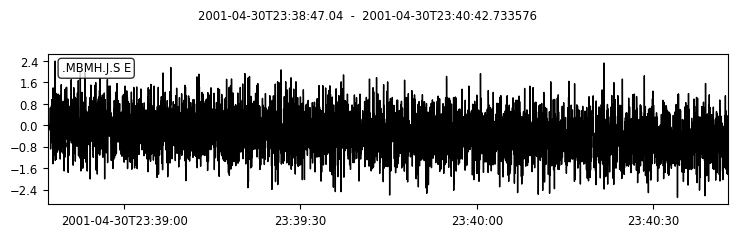

1093.65982953 14.54528301


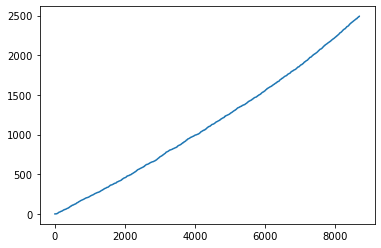

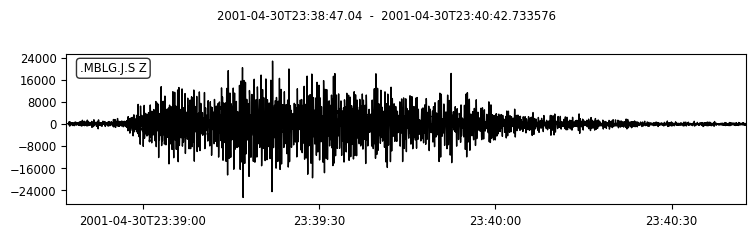

857.723463224 11.4074140607


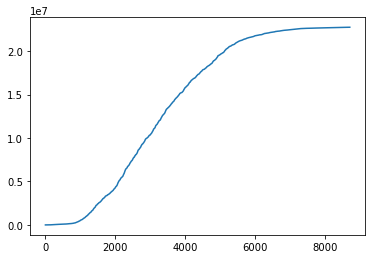

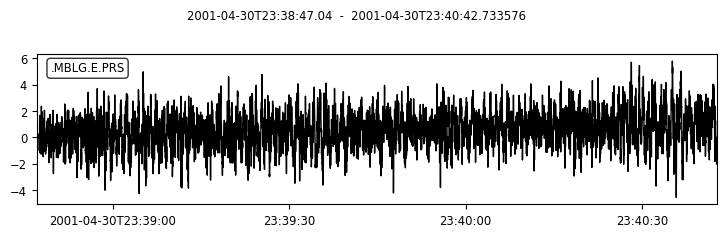

891.550148736 11.8572968312


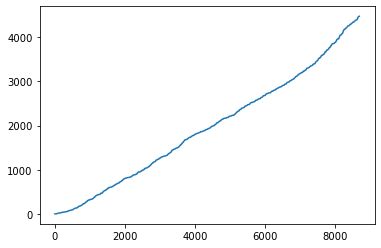

In [56]:
import matplotlib.pyplot as plt
    
def envelope_width(stin):
    st = stin.detrend()
    noise_secs = 20.0
    for tr in st:
        a = abs(tr.data)
        if noise_secs > 0.0:
            n = int(noise_secs / tr.stats.delta)
            noise1 = np.std(a[:n])
            noise2 = np.std(a[-n:])
            noise_min = np.min([noise1, noise2])
            a = a - noise_min
            a[a<0]=0
        amax = max(a) # maximum amplitude
        I = np.cumsum(a) # cumulative amplitude
        p = I[-1]/amax
        tr.plot()
        plt.plot(I)
        print(p, p*tr.stats.delta)
        
        I > I[-1]*0.05
        I > I[-1]*0.95
        

envelope_width(st1)

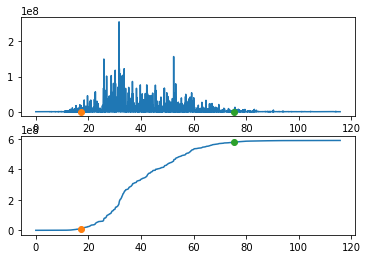

17.18 75.53 58.35


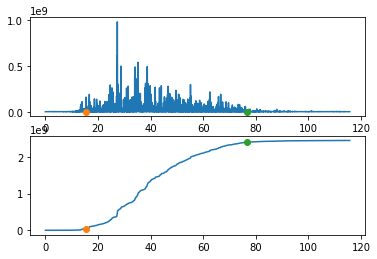

15.43 76.63 61.2


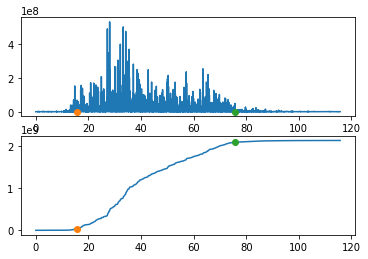

15.69 75.7 60.01


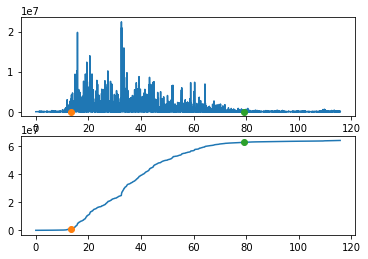

13.55 79.19 65.64


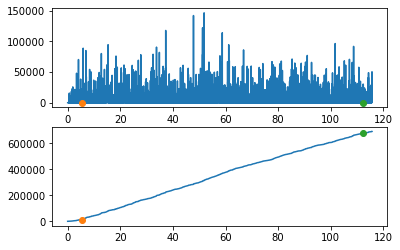

5.29 112.3 107.01


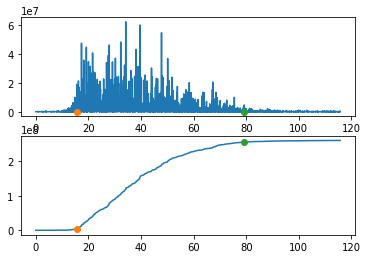

15.57 78.99 63.42


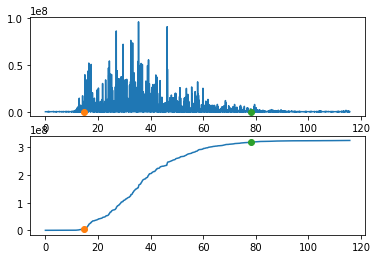

14.62 78.18 63.56


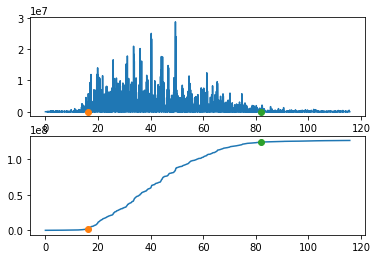

16.28 81.94 65.66


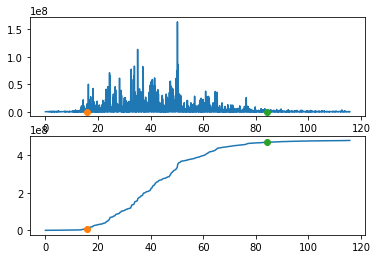

15.92 84.35 68.43


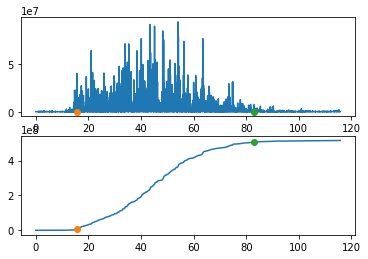

15.63 82.76 67.13


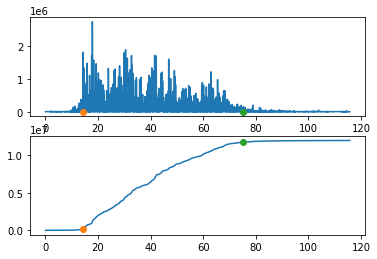

14.28 75.12 60.84


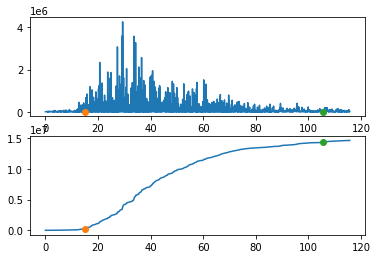

15.03 105.39 90.36


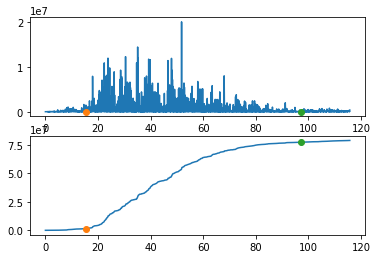

15.37 97.1 81.73


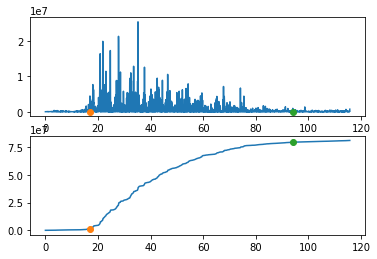

16.96 94.04 77.08


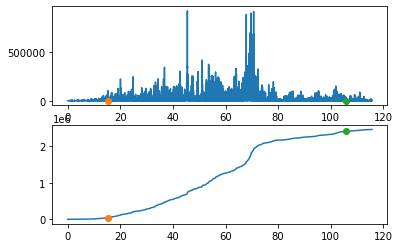

15.29 105.85 90.56


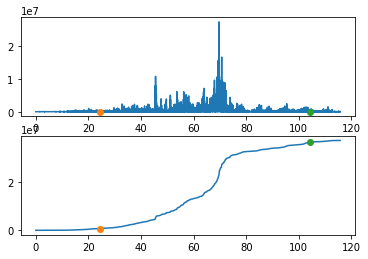

24.29 104.34 80.05


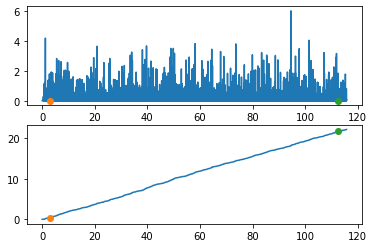

2.85 112.63 109.78


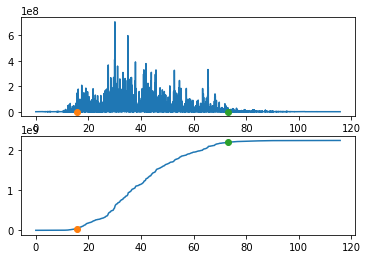

15.57 72.94 57.37


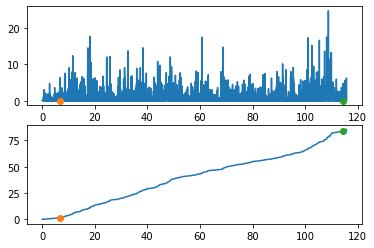

6.84 114.26 107.42


In [55]:
def envelope_width2(st):
    st.filter('bandpass', freqmin=0.3, freqmax=25.0, corners=4)
    noise_secs = 1.0
    min_frac = 0.01
    max_frac = 0.99
    for tr in st:
        a = abs(tr.data)
        if noise_secs > 0.0:
            n = int(noise_secs / tr.stats.delta)
            noise1 = np.std(a[:n])
            noise2 = np.std(a[-n:])
            noise_min = np.min([noise1, noise2])
            a = a - noise_min
            a[a<0]=0
        e = np.power(a,2)
        I = np.cumsum(e) * tr.stats.delta # cumulative amplitude
        plt.figure()
        plt.subplot(2,1,1)
        plt.plot(tr.times(), e)
        plt.subplot(2,1,2)
        plt.plot(tr.times(), I)
        maxI = np.max(I)
        
        p5 = np.percentile(I, 20)
        p95 = np.percentile(I, 80)
        i5 = np.where(I >= maxI*min_frac)
        i95 = np.where(I <= maxI*max_frac)
        startt = np.round(i5[0][0] * tr.stats.delta, 2)
        endt = np.round(i95[0][-1] * tr.stats.delta, 2)
        duration = endt - startt
        plt.plot(startt, maxI*min_frac, 'o')
        plt.plot(endt, maxI*max_frac, 'o')
        
        plt.subplot(2,1,1)
        plt.plot(startt, 0, 'o')
        plt.plot(endt, 0, 'o')        
        
        plt.show()
        print(startt, endt, duration)
        
        

envelope_width2(st1)